# 1.3 Anvendelse: Estimering av hastighet fra posisjonsdata
Dersom vi deriverer en funksjon $x = x(t)$ som uttrykker posisjonen til et objekt langs $x$-aksen som funksjon av tid $t$, vil vi som kjent få hastigheten $v = v(t)$ ved tid $t$: $x'(t) = v(t)$.

<img src="Maleserie.png" style="width:70%"/>

Gitt en rekke målinger $\{x_k\}_{k=0}^{n}$ av posisjonen $x$ på tidspunkter $t_0 < \dots < t_k < \dots < t_n$, vil forhåpentlig, dersom målingene er nøyaktige nok, $x_k$ være en god tilnærming av $x(t_k)$.
Videre, dersom tiden mellom påfølgende målinger er relativt liten kan vi bruke differansene som vi så tidligere til å beregne tilnærminger av hastigheten i hvert målepunkt.
Hastigheten $v(t_k)$ ved $t=t_k$ kan da estimeres ved hjelp av foroverdifferanse, bakoverdifferanse eller sentraldifferanse:

$$ \frac{x(t_{k+1})-x(t_k)}{t_{k+1}-t_k} \quad k = 0,\dots,n-1, \qquad \frac{x(t_{k})-x(t_{k-1})}{t_{k}-t_{k-1}} \quad k = 1,\dots,n, \qquad \text{eller} \qquad \frac{x(t_{k+1})-x(t_{k-1})}{t_{k+1}-t_{k-1}}, \quad k = 1,\dots,n-1,$$

hvor vi igjen tilnærmer $x(t_k)$ med målingen $x_k$.

### Posisjonsdata for drone
La oss anta at vi ser på en drone som beveger seg i én bestemt retning, så vi kan betrakte bevegelsen som éndimensjonal, og posisjonen langs denne retningen ved tid $t$ er gitt av $x(t)$.
Videre har denne dronen en GPS som måler denne posisjonen, og vi er gitt en rekke målinger (måleserie) $\{x_k\}_{k=0}^n$ fra denne gjort ved $h$ sekunders mellomrom, slik at $t_k = k h$ for $h > 0$ og heltall $k \in \{0,\dots,n\}$. <img src="Quadcopter.jpg" style="width:25%" align="right"/>

Da kan vi bruke de numeriske derivasjonsmetodene ovenfor til å tilnærme hastigheten ved disse måletidspunktene: her bruker vi bakoverdifferanser til å tilnærme hastigheten $v(t_k)$ med $v_k$ definert som

$$ v_k \doteq \frac{x_{k}-x_{k-1}}{h}, \qquad k \in \{1,\dots,n\}. $$

Merk at siden vi her trenger forrige målepunkt $k-1$ for å finne verdien i $k$ så får vi bare tilnærminger av hastigheten i $t_k$ for $k > 0$.

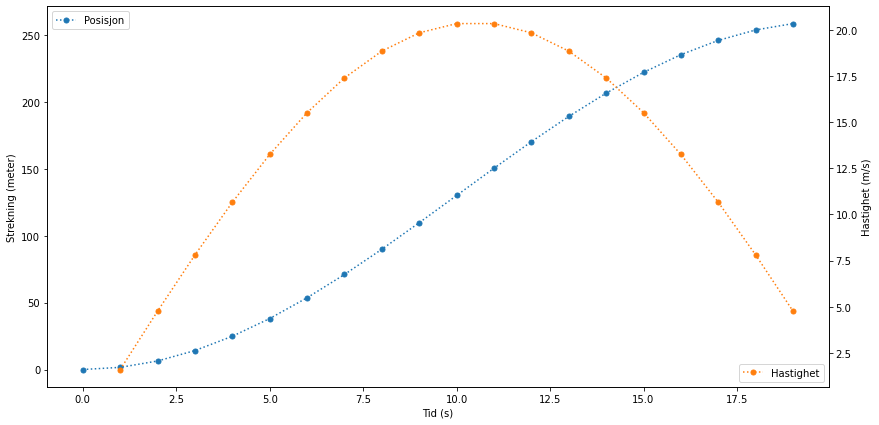

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Array med posisjonsdata:
x_n = np.array([  0.       ,   1.6005157,   6.3626529,  14.1691519,  24.8277907,
                38.0761184,  53.5879172,  70.981235 ,  89.8277907, 109.6635195,
               130.       , 150.3364805, 170.1722093, 189.018765 , 206.4120828,
               221.9238816, 235.1722093, 245.8308481, 253.6373471, 258.3994843])

h =  1 # Sekund mellom hver måling
t_n = np.arange(0, len(x_n)*h, h) # Tidspunkt for målinger
plt.figure(figsize=(14,7))
plt.plot(t_n, x_n, ':o', markersize=5, label="Posisjon")
plt.xlabel('Tid (s)')
plt.ylabel('Strekning (meter)')
plt.legend(loc="upper left")

v_n = np.zeros(len(x_n)-1)
for n in range(1, len(x_n)): # Legg merke til at vi starter i n=1!
    v_n[n-1] = (x_n[n]-x_n[n-1])/h
    
plt.twinx()
plt.plot(t_n[1:], v_n, ':oC1', markersize=5, label="Hastighet")
plt.ylabel("Hastighet (m/s)")
plt.legend(loc="lower right")
plt.grid(False)

I plottet ovenfor ser vi posisjonsmålingene $x_k$ i blått, og de estimerte hastighetene $v_k$ i oransje.

En ulempe med GPS-data er at de kan være litt unøyaktige: den målte posisjonen kan "hoppe" litt frem og tilbake, noe som vil gi merkbart utslag i den estimerte hastigheten.
For å få bedre estimater kan det derfor være en god idé å kombinere GPS-målinger med andre typer målinger, for eksempel av akselerasjon: vi skal se hvordan dette kan benyttes etter at vi har lært om numerisk integrasjon.

> $\impliedby$ [1.2 Numerisk derivasjon: ustabilitet](1_diffint_ustabilitet.ipynb) | [1.4 Numerisk integrasjon: det bestemte integralet og riemannsummer](1_diffint_integrasjon.ipynb) $\implies$